# Assignment09
# This script is about classifying 0 images(in minst) with random features.
# Name : Lee Gyu Hyeong
# Student ID : 20122208
# Link to github : https://github.com/GyuHyeong/assignment09.git

# Import packages for plotting graphs and manipulating data. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Bring images and set properly for manipulating.

In [2]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:]) #float형으로 변형
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    
   
    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1

# Define a function that has parameter p(dimension of model parameter) and checks prediction errors by classifying images whether 0 or not.

In [3]:
def classifier_0_with_randomfeatures(p):
    #-------this section is for finding out model parameters(theta0_r)-----
    list_label_train_0 = np.empty(num_train, dtype=int)
    for i in range(num_train):
        if (list_label_train[i]==0):
            list_label_train_0[i]=1
        else:
            list_label_train_0[i]=-1
    
    R=np.empty((p,size_row * size_col),dtype=float)
    count=0
    for i in range(p): #R is 
        r=np.random.normal(0,1,size_row * size_col)
        R[count,:]  = r    
        count += 1
        
    A0_r=(R.dot(list_image_train)).T
    theta0_r=((np.linalg.pinv((A0_r.T).dot(A0_r))).dot(A0_r.T)).dot(list_label_train_0)
    #------------------------------------------------------------------
    
    #---this section is for finding out Tp,Tn,Fp and Fn which are related with error rate ---
    #---this section is executed with training set.
    A0_r_train=(R.dot(list_image_train)).T
    y_train=A0_r_train.dot(theta0_r)
    for i in range(num_train):
        if(y_train[i]<0):
            y_train[i]=-1
        elif(y_train[i]>=0):
            y_train[i]=1
    Tp_train=0 
    Tn_train=0 
    Fp_train=0 
    Fn_train=0
    for i in range(num_train):
        if(list_label_train[i]==0 and y_train[i]==1):
            Tp_train+=1
        elif(list_label_train[i]==0 and y_train[i]==-1):
            Fn_train+=1
        elif(list_label_train[i]!=0 and y_train[i]==1):
            Fp_train+=1
        elif(list_label_train[i]!=0 and y_train[i]==-1):
            Tn_train+=1
    print('\n\n\n---------------------------------------',)
    print('when p=',p)
    print('\nabout training set')
    print('Tp:',Tp_train,'Tn:',Tn_train,'Fp:',Fp_train,'Fn:',Fn_train)
    #------------------------------------------------------------------
    
    #---this section is for finding out Tp,Tn,Fp and Fn which are related with error rate ---
    #---this sextion is plotting the average images of each of Tp,Tn,Fp,Fn.
    #---this section is executed with test set.
    A0_r_test=(R.dot(list_image_test)).T
    y=A0_r_test.dot(theta0_r)
    for i in range(num_test):
        if(y[i]<0):
            y[i]=-1
        elif(y[i]>=0):
            y[i]=1
    Tp=0 
    Tn=0 
    Fp=0 
    Fn=0
    im_average_Tp  = np.zeros(size_row * size_col, dtype=float)
    im_average_Tn  = np.zeros(size_row * size_col, dtype=float)
    im_average_Fp  = np.zeros(size_row * size_col, dtype=float)
    im_average_Fn  = np.zeros(size_row * size_col, dtype=float)    
    for i in range(num_test):
        if(list_label_test[i]==0 and y[i]==1):
            Tp+=1
            im_average_Tp+=list_image_test[:,i]
        elif(list_label_test[i]==0 and y[i]==-1):
            Fn+=1
            im_average_Fn+=list_image_test[:,i]
        elif(list_label_test[i]!=0 and y[i]==1):
            Fp+=1
            im_average_Fp+=list_image_test[:,i]
        elif(list_label_test[i]!=0 and y[i]==-1):
            Tn+=1
            im_average_Tn+=list_image_test[:,i]
    print('\n\nabout test set')
    print('Tp:',Tp,'Tn:',Tn,'Fp:',Fp,'Fn:',Fn)
    precision=Tp/(Tp+Fp)
    recall=Tp/(Tp+Fn)
    F1_score=(2*precision*recall)/(precision+recall)
    print('F1 score:',F1_score)
    
    im_average_Tp /= Tp
    im_average_Tn /= Tn
    im_average_Fp /= Fp
    im_average_Fn /= Fn
    
    plt.subplot(2,2,1)
    plt.title('Tp average image')
    plt.imshow(im_average_Tp.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    frame   = plt.gca(); frame.axes.get_xaxis().set_visible(False); frame.axes.get_yaxis().set_visible(False)
    plt.subplot(2,2,2)
    plt.title('Tn average image')
    plt.imshow(im_average_Tn.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    frame   = plt.gca(); frame.axes.get_xaxis().set_visible(False); frame.axes.get_yaxis().set_visible(False)
    plt.subplot(2,2,3)
    plt.title('Fp average image')
    plt.imshow(im_average_Fp.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    frame   = plt.gca(); frame.axes.get_xaxis().set_visible(False); frame.axes.get_yaxis().set_visible(False)
    plt.subplot(2,2,4)
    plt.title('Fn average image')
    plt.imshow(im_average_Fn.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    frame   = plt.gca(); frame.axes.get_xaxis().set_visible(False); frame.axes.get_yaxis().set_visible(False)
    plt.show()
    #-----------------------------------------------------------------
    return 


# Execute the function with different p.




---------------------------------------
when p= 32

about training set
Tp: 4467 Tn: 53513 Fp: 564 Fn: 1456


about test set
Tp: 746 Tn: 8931 Fp: 89 Fn: 234
F1 score: 0.8220385674931129


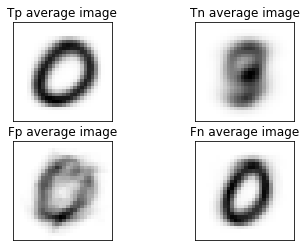




---------------------------------------
when p= 64

about training set
Tp: 4700 Tn: 53578 Fp: 499 Fn: 1223


about test set
Tp: 782 Tn: 8940 Fp: 80 Fn: 198
F1 score: 0.8490770901194354


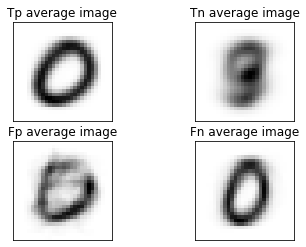




---------------------------------------
when p= 128

about training set
Tp: 5094 Tn: 53662 Fp: 415 Fn: 829


about test set
Tp: 884 Tn: 8955 Fp: 65 Fn: 96
F1 score: 0.9165370658372214


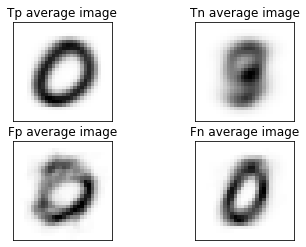




---------------------------------------
when p= 256

about training set
Tp: 5283 Tn: 53736 Fp: 341 Fn: 640


about test set
Tp: 908 Tn: 8961 Fp: 59 Fn: 72
F1 score: 0.9327170005136107


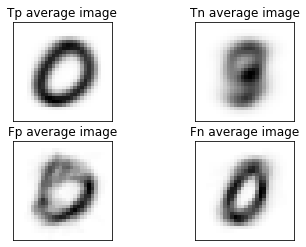




---------------------------------------
when p= 512

about training set
Tp: 5336 Tn: 53754 Fp: 323 Fn: 587


about test set
Tp: 917 Tn: 8957 Fp: 63 Fn: 63
F1 score: 0.9357142857142857


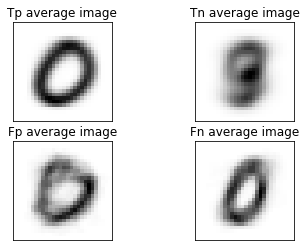




---------------------------------------
when p= 1024

about training set
Tp: 5347 Tn: 53759 Fp: 318 Fn: 576


about test set
Tp: 917 Tn: 8959 Fp: 61 Fn: 63
F1 score: 0.9366700715015321


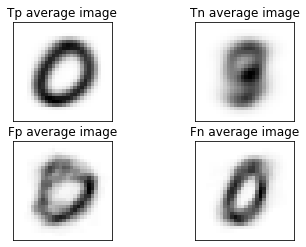

In [4]:
classifier_0_with_randomfeatures(2**5)
classifier_0_with_randomfeatures(2**6)
classifier_0_with_randomfeatures(2**7)
classifier_0_with_randomfeatures(2**8)
classifier_0_with_randomfeatures(2**9)
classifier_0_with_randomfeatures(2**10)
